# MinDE System with Spatiocyte Simulator

In [1]:
%matplotlib inline
from ecell4 import *
from ecell4_base.core import *
from ecell4_base import spatiocyte

Declaring Species and ReactionRules:

In [2]:
with species_attributes():
    cytoplasm | {'radius': 1e-8, 'D': 0, 'dimension': 3}
    MinDatp | MinDadp | {'radius': 1e-8, 'D': 16e-12, 'location': 'cytoplasm', 'dimension': 3}
    MinEE_C | {'radius': 1e-8, 'D': 10e-12, 'location': 'cytoplasm', 'dimension': 3}
    membrane | {'radius': 1e-8, 'D': 0, 'location': 'cytoplasm', 'dimension': 2}
    MinD | MinEE_M | MinDEE | MinDEED | {'radius': 1e-8, 'D': 0.02e-12, 'location': 'membrane', 'dimension': 2}
    
with reaction_rules():
    membrane + MinDatp > MinD | 2.2e-8
    MinD + MinDatp > MinD + MinD | 3e-20
    MinD + MinEE_C > MinDEE | 5e-19
    MinDEE > MinEE_M + MinDadp | 1
    MinDadp > MinDatp | 5
    MinDEE + MinD > MinDEED | 5e-15
    MinDEED > MinDEE + MinDadp | 1
    MinEE_M > MinEE_C | 0.83
    
m = get_model()

Make a World.

In [3]:
f = spatiocyte.Factory(1e-8)
w = f.world(Real3(4.6e-6, 1.1e-6, 1.1e-6))
w.bind_to(m)

Make a Structures.

In [4]:
rod = Rod(3.5e-6, 0.51e-6, w.edge_lengths() * 0.5)
w.add_structure(Species('cytoplasm'), rod)
w.add_structure(Species('membrane'), rod.surface())

47496

Throw-in molecules.

In [5]:
w.add_molecules(Species('MinDadp'), 1300)
w.add_molecules(Species('MinDEE'), 700)

Run a simulation for 240 seconds.

In [6]:
sim = f.simulator(w, m)

In [7]:
# from functools import reduce
# alpha = reduce(lambda x, y: min(x, sim.calculate_alpha(y)), m.reaction_rules())
# sim.set_alpha(alpha)

In [8]:
from ecell4.util.progressbar import progressbar_notebook

In [9]:
obs1 = FixedIntervalNumberObserver(0.1, ('MinDatp', 'MinDadp', 'MinEE_C', 'MinD', 'MinEE_M', 'MinDEE', 'MinDEED'))

In [10]:
obs2 = FixedIntervalHDF5Observer(1.0, "minde%03d.h5")

In [11]:
duration = 240

In [12]:
progressbar_notebook(sim).run(duration, (obs1, obs2))

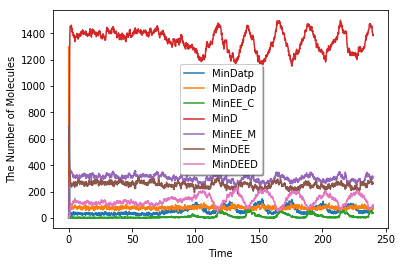

In [13]:
show(obs1)

In [14]:
viz.plot_movie_with_matplotlib([spatiocyte.SpatiocyteWorld("minde%03d.h5" % i) for i in range(obs2.num_steps())], species_list=('MinD', 'MinEE_M', 'MinDEE', 'MinDEED'))

In [15]:
viz.plot_world(spatiocyte.SpatiocyteWorld("minde240.h5"), species_list=('MinD', 'MinEE_M', 'MinDEE', 'MinDEED'))